In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sea
pd.set_option('precision', 3)
sea.set()

In [2]:
usa_file = Path('US') / 'responses.csv'
france_file = Path('France') / 'responses-adjusted.csv'
canada_file = Path('Canada') / 'responses.csv'
germany_file = Path('Germany') / 'responses.csv'

# Helper functions
def add_bar_graph_counts(ax, label=None):
    if label:
        ax.set_xlabel(label)
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, height + .1, int(height), ha='center', va='bottom')

## USA

In [3]:
df_usa = pd.read_csv(usa_file)
df_usa.drop(df_usa[df_usa['Timestamp'] == "fake entry"].index, inplace=True)
df_usa['Timestamp']
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 250
Data columns (total 20 columns):
 #   Column                                                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   Timestamp                                                                                                                                                                                       

### Most represented regions

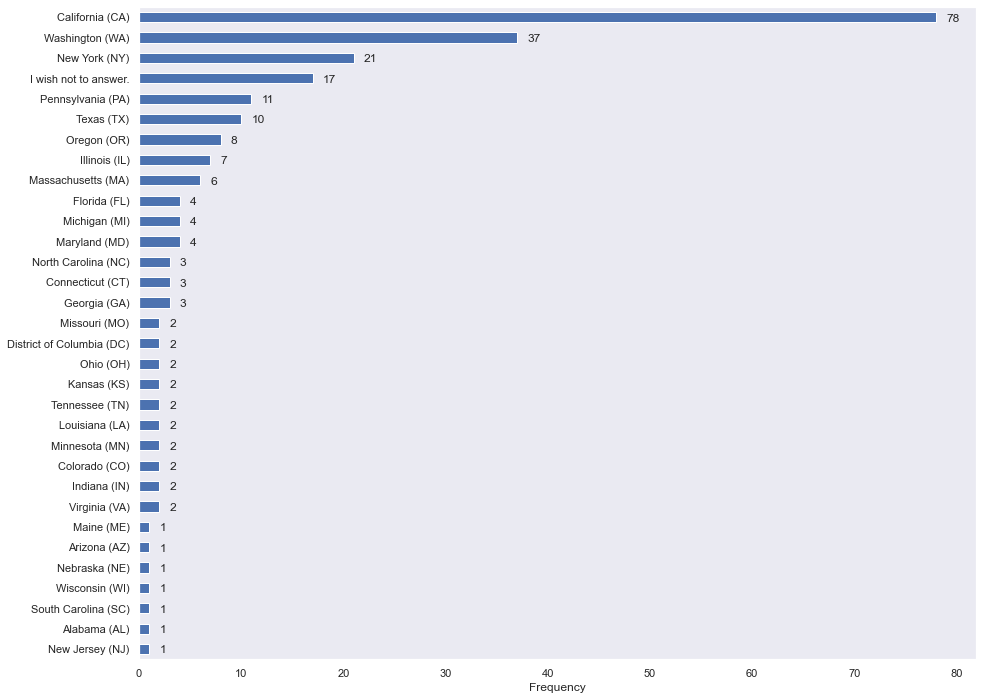

In [4]:
region_value_counts = df_usa['Which state or territory in the U.S. do you primarily work from? [If you are a late entry filling this out in 2020, please answer with answers that are true for your 2019. Thank you!]'].value_counts().sort_values()
ax = region_value_counts.plot(kind='barh', figsize=(15,12), grid=False)
ax.set_xlabel('Frequency')
for patch, count in zip(ax.patches, region_value_counts.values):
    length = patch.get_width()
    ax.text(length + 1, patch.get_y() - .05, count, ha='left', va='bottom')

### Employment Status

How many people were in each employment category.

In [5]:
df_usa['employment_status'] = df_usa['What is your employment status as a game writer?'].str.split(' - ').map(lambda x: x[0])
df_usa['employment_status'].value_counts()

Full time employee      87
Part Time Freelancer    72
Full Time Freelancer    41
Full time contractor    21
Solo developer           8
Part time executive      6
Part time employee       5
Full time executive      3
Name: employment_status, dtype: int64

### Marginalized groups

In [6]:
df_usa['is_marginalized'] = df_usa['Do you identify as part of a marginalized community?'].apply(lambda x: x == 'Yes')
df_usa['Do you identify as part of a marginalized community?'].value_counts()

Yes    131
No     112
Name: Do you identify as part of a marginalized community?, dtype: int64

### Years of Experience

Note: if a bin says '0', it may just be because respondents rounded the number of years they have been in the industry. That's probably why there's a spike at the 10-year step, when some of those respondents might really be in the 11-14 year range.

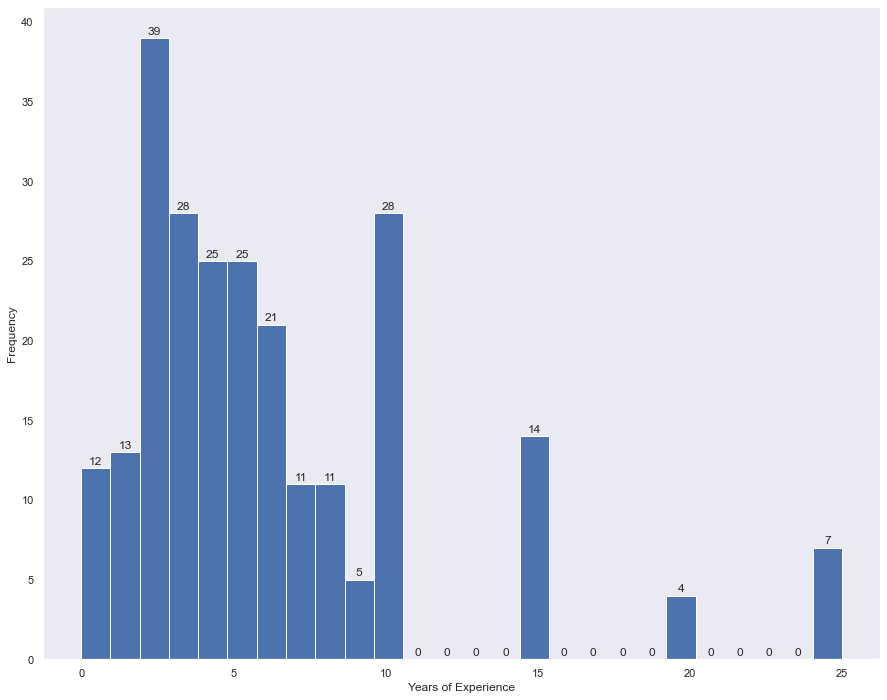

In [7]:
df_usa['yoe'] = df_usa['How many years of experience do you have as a game writer? [If you are a late entry filling this out in 2020, please answer with answers that are true for your 2019. Thank you!]']
df_usa['yoe'] = df_usa.yoe.str.replace('1 - 6 months', '0').str.replace(r'-\d+', '').str.replace(r'\D', '').astype(int)
ax = df_usa['yoe'].plot(kind='hist', bins=26, figsize=(15,12), grid=False)
add_bar_graph_counts(ax, 'Years of Experience')

### 2018 Salaries

This bar graph visualizes the number of people in each 'bracket' of income. Each bin on the horizontal axis spans $10,000, so the first column shows 61 people made between 0-10,000, the second shows 20 made 10,000-20,000, etc.

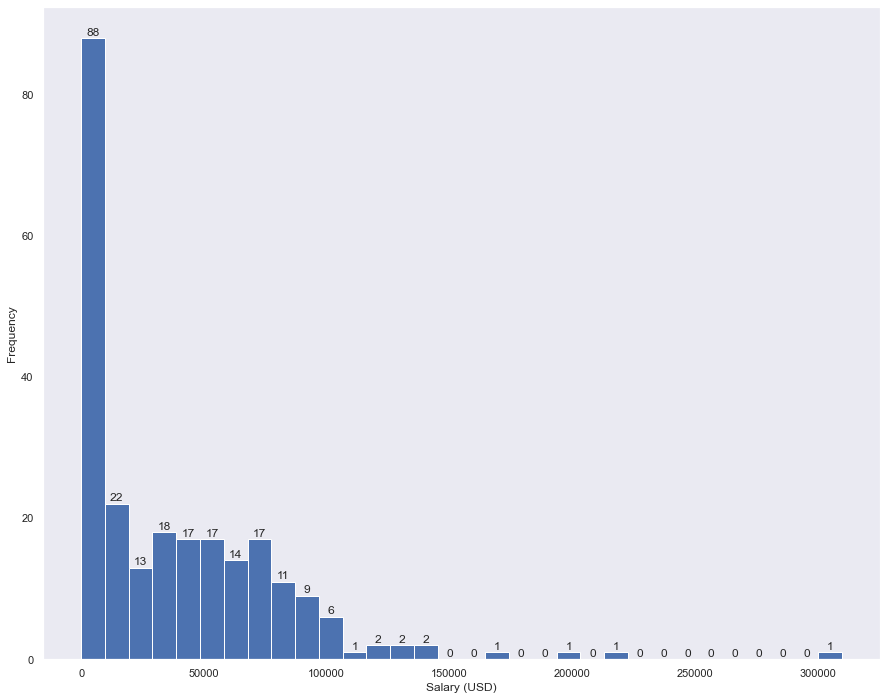

In [8]:
df_usa['income_2018'] = df_usa['What was your net income from game writing in 2018 ? ']
df_usa['income_2018'] = df_usa['income_2018'].str.replace(r'\d+-', '').str.replace(r'k\b', '000').str.replace(r'\.\d+\b', '').str.replace(r'\D', '').apply(lambda x: x if x != '' else '-1').astype(int)
ax = df_usa['income_2018'].plot(kind='hist', bins=df_usa.income_2018.max() // 10000 + 1, figsize=(15,12), grid=False)
add_bar_graph_counts(ax, 'Salary (USD)')

#### Small income

Descriptive statistics for the 7 respondents claiming to have made less than $1,000 USD in 2019 from game writing.

In [9]:
df_usa.query('income_2018 > 0 & income_2018 < 1000')[['income_2018']].describe()

,income_2018
count,10.000
mean,327.200
std,226.038
min,1.000
25%,161.750
50%,348.500
75%,500.000
max,600.000


#### Large income

Look at the descriptive statistics for the 16 respondents claiming to have made more than $100,000 USD in 2018 from game writing.

In [10]:
df_usa.query('income_2018 > 100000')[['income_2018']].describe()

,income_2018
count,13.000
mean,154461.538
std,57838.302
min,104000.000
25%,120000.000
50%,135000.000
75%,165000.000
max,310000.000


### 2019 income and rates

This bar graph visualizes the number of people in each 'bracket' of income. Each bin on the horizontal axis spans $10,000, so the first column shows 61 people made between 0-10,000, the second shows 20 made 10,000-20,000, etc.

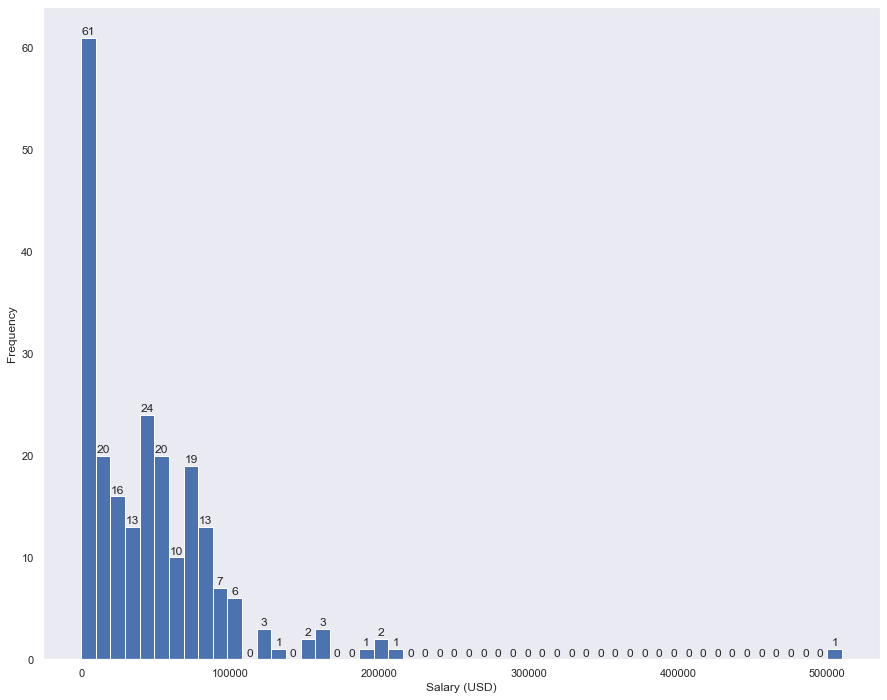

In [11]:
df_usa['income_2019'] = df_usa['What do you expect your net income from game writing to be in 2019? [If you are a late entry filling this out in 2020, please answer with the amount of money you did make in 2019, if you feel comfortable doing so.]']
df_usa['income_2019'] = df_usa['income_2019'].str.replace(r'\d+-', '').str.replace(r'k\b', '000').str.replace(r'\.\d+\b', '').str.replace(r'\D+', '').apply(lambda x: x if x != '' else '-1').fillna('-1').astype(int)
ax = df_usa.query('income_2019 > -1').income_2019.plot(kind='hist', bins=df_usa.income_2019.max() // 10000 + 1, figsize=(15,12), grid=False)
add_bar_graph_counts(ax, 'Salary (USD)')

In [12]:
df_usa['income_2019'].value_counts().loc[-1]

20

There are 20 entries whose salary data was null for 2019

#### Small income

Descriptive statistics for the 7 respondents claiming to have made less than $1,000 USD in 2019 from game writing.

In [13]:
df_usa.query('income_2019 > 0 & income_2019 < 1000')[['income_2019']].describe()

,income_2019
count,7.000
mean,244.714
std,248.634
min,3.000
25%,55.000
50%,100.000
75%,450.000
max,600.000


#### Large income

Look at the descriptive statistics for the 16 respondents claiming to have made more than $100,000 USD in 2019 from game writing.

In [14]:
df_usa.query('income_2019 > 100000')[['income_2019']].describe()

,income_2019
count,16.000
mean,175200.000
std,95583.262
min,105000.000
25%,120000.000
50%,156500.000
75%,192500.000
max,510000.000


#### Rates

In [15]:
df_usa['rates'] = df_usa['How much are you charging for game writing in 2019? (Rate)']
df_usa['rates'].str.isnumeric().value_counts()

False    94
True     43
Name: rates, dtype: int64

Most of the Rate entries are not numeric, so it will require further processing before they can be used.

### Income by identity

In [16]:
df_usa.query('income_2019 > -1').groupby('is_marginalized').describe().transpose()

is_marginalized         False       True 
yoe         count     101.000     122.000
            mean        7.446       4.869
            std         5.737       4.086
            min         0.000       0.000
            25%         3.000       2.000
            50%         6.000       4.000
            75%        10.000       6.000
            max        25.000      25.000
income_2018 count     101.000     122.000
            mean    46905.396   33092.139
            std     52623.664   32762.079
            min         0.000       0.000
            25%      6000.000    2500.000
            50%     35000.000   25500.000
            75%     70000.000   55000.000
            max    310000.000  135000.000
income_2019 count     101.000     122.000
            mean    53475.069   39654.934
            std     65255.448   38436.642
            min         0.000       0.000
            25%     12000.000    4625.000
            50%     40000.000   33500.000
            75%     75000.000   62250.000
            max    510000.000  190000.000

### 2019 Income by Years of Experience

Each row shows the descriptive statistics for respondents with (at least) a certain number of years of experience; 2018 is on the left, 2019 on the right. The `count` column shows how many submissions there were in this category, while the 25/50/75% columns are percentiles. The descriptive statistics may not be reliable if there the count is small.

In [17]:
sal_by_yoe = df_usa.query('income_2019 > -1').groupby('yoe')
sal_by_yoe.describe()

income_2018                                                              \
          count       mean        std      min      25%      50%        75%   
yoe                                                                           
0           9.0   4388.889   8601.518      0.0      0.0      0.0     500.00   
1          12.0   9125.000  18526.498      0.0    750.0   1750.0    6250.00   
2          36.0  24987.444  24967.926      0.0   2550.0  12000.0   45815.75   
3          25.0  34342.640  23401.244      0.0  11000.0  43000.0   54000.00   
4          24.0  31896.500  27840.344      0.0   3425.0  29000.0   58875.00   
5          24.0  30037.375  29947.820      0.0   4750.0  18500.0   50000.00   
6          20.0  48015.000  49031.400      0.0   3375.0  34000.0   77500.00   
7          11.0  34363.636  33257.398      0.0   5000.0  24000.0   61000.00   
8          11.0  61818.182  45216.851      0.0  24500.0  70000.0   91000.00   
9           4.0  95375.000  85531.062  15000.0  49875.0  75750.0  121250.00   
10         25.0  59431.800  73469.195      0.0   6000.0  35000.0   80000.00   
15         13.0  78504.923  32250.509  12000.0  68500.0  83564.0   95000.00   
20          4.0  35000.000  30539.592  10000.0  15250.0  26000.0   45750.00   
25          5.0  67000.000  45771.170  10000.0  30000.0  80000.0   95000.00   

              income_2019                                                     \
          max       count       mean         std      min       25%      50%   
yoe                                                                            
0     21000.0         9.0  21877.778   21197.510      0.0   4500.00  15000.0   
1     65000.0        12.0  17000.417   18612.347   2000.0   4650.00  10000.0   
2     78000.0        36.0  27382.583   26387.783      0.0   3000.00  15000.0   
3     72000.0        25.0  36512.320   29255.666      0.0  12000.00  35000.0   
4     85000.0        24.0  44863.833   31185.802   1500.0  17000.00  50500.0   
5     92000.0        24.0  32626.375   33154.088      0.0   2875.00  27000.0   
6    165000.0        20.0  57110.000   55219.084      0.0  12750.00  47500.0   
7    100000.0        11.0  51818.182   43326.247   3000.0  15000.00  50000.0   
8    135000.0        11.0  65409.091   53901.214      0.0  27500.00  70000.0   
9    215000.0         4.0  68125.750   90262.171      3.0  16875.75  36250.0   
10   310000.0        25.0  73777.200  104433.521      0.0  10000.00  50000.0   
15   145000.0        13.0  88153.846   44549.310  36000.0  50000.00  85000.0   
20    78000.0         4.0  38250.000   28616.720  15000.0  18750.00  30000.0   
25   120000.0         5.0  46400.000   52433.768      0.0   1000.00  31000.0   

                          
           75%       max  
yoe                       
0     40000.00   52000.0  
1     20601.25   65000.0  
2     48500.00   90000.0  
3     56500.00   93000.0  
4     70000.00  100000.0  
5     46750.00  105000.0  
6     81250.00  210000.0  
7     72500.00  150000.0  
8     85000.00  190000.0  
9     87500.00  200000.0  
10    95000.00  510000.0  
15   100000.00  160000.0  
20    49500.00   78000.0  
25    80000.00  120000.0

Text(0, 0.5, 'Salary (USD)')

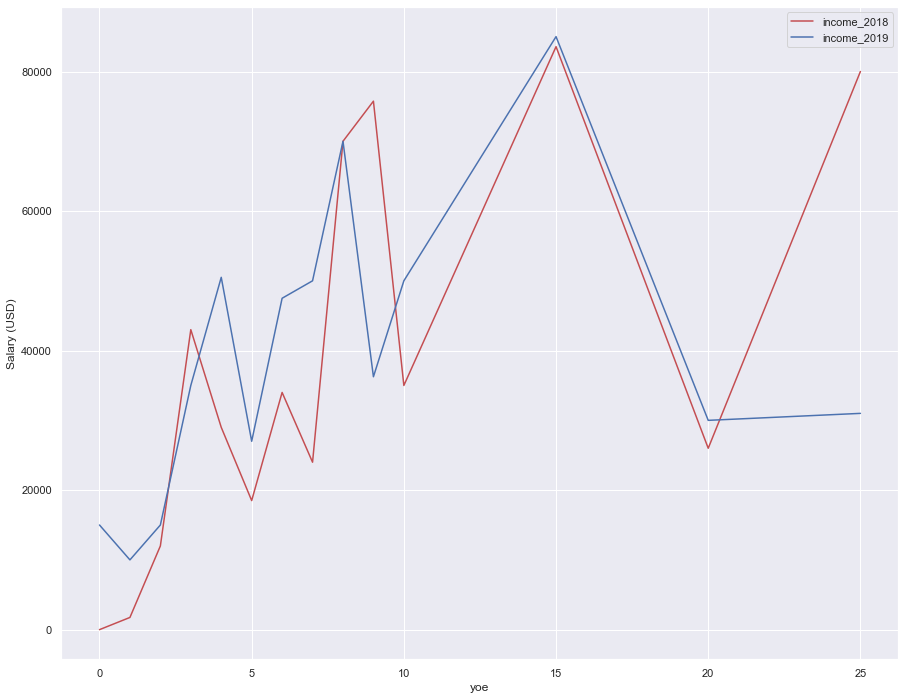

In [18]:
ax = sal_by_yoe[['income_2018', 'income_2019']].median().plot(kind='line', color=['r', 'b'], figsize=(15,12))
# sal_by_yoe.median().plot(kind='line', color=['r', 'b'], style='--', ax=ax)
ax.set_ylabel('Salary (USD)')

#### Descriptive Statistics

In [19]:
df_usa['yoe'].describe()

count    243.000
mean       6.095
std        5.281
min        0.000
25%        2.000
50%        5.000
75%        8.000
max       25.000
Name: yoe, dtype: float64

### Should Game Writers form Unions?

In [20]:
df_usa['Should game writers work with a pre-existing labor organization?'].value_counts().head(6)

Maybe                                                                             77
Yes                                                                               60
Unsure/Don't know enough about the options to feel comfortable making a choice    37
No - We should form a union for all game developers                               29
No - We should form our own specific guild or union for U.S game writers          22
No                                                                                 7
Name: Should game writers work with a pre-existing labor organization?, dtype: int64

## Canada

In [21]:
df_canada = pd.read_csv(canada_file)
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 19 columns):
 #   Column                                                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   Timestamp                                                                                                                                                                                           

### Most represented region

In [22]:
df_canada['Which province or territory in Canada do you primarily work from?'].value_counts()

Ontario (ON)    4
Quebec (QC)     3
Name: Which province or territory in Canada do you primarily work from?, dtype: int64

## France

In [23]:
df_france = pd.read_csv(france_file)
df_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 41 columns):
 #   Column                                                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                           --------------  -----  
 0   By clicking the checkbox below, I consent to have my survey answers used for the purposes of publishing public information about game writing, as well as having the information used for genera

In [24]:
df_france['is_marginalized'] = df_france['Do you identify as part of a marginalized community?'].apply(lambda x: x == 'Yes')
df_france['is_marginalized'].value_counts()

False    23
True     15
Name: is_marginalized, dtype: int64

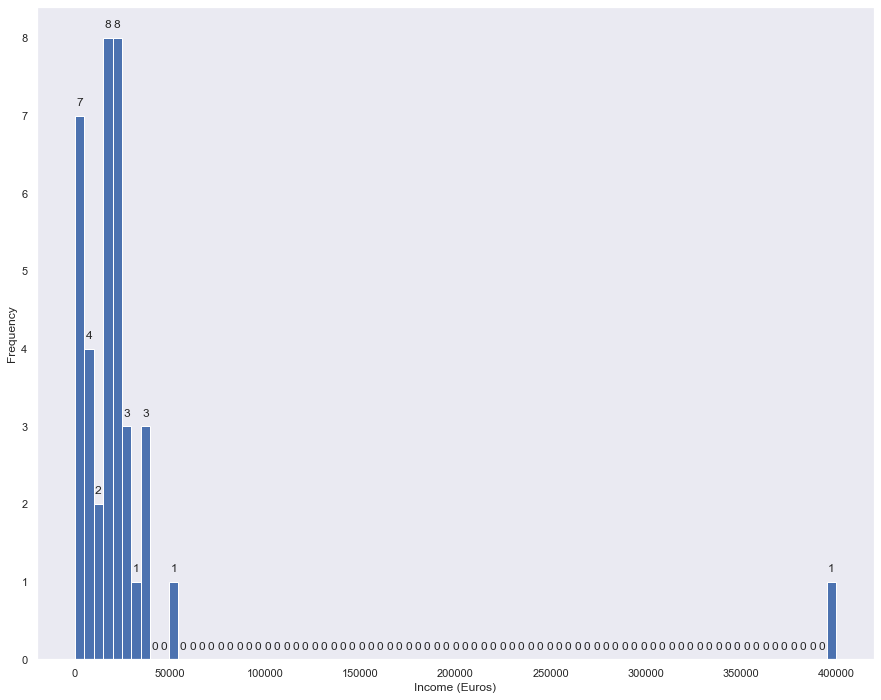

In [25]:
df_france['income_2019'] = df_france['What do you expect your net income from game writing to be in 2019? (yearly, in Euros)']
# df_france['income_2019'] = df_france['income_2019'].str.replace(r'\d+-', '').str.replace(r'k\b', '000').str.replace(r'\.\d+\b', '').str.replace(r'\D+', '').apply(lambda x: x if x != '' else '-1').fillna('-1').astype(int)
ax = df_france.query('income_2019 > -1').income_2019.plot(kind='hist', bins=df_france.income_2019.max() // 5000 + 1, figsize=(15,12), grid=False)
add_bar_graph_counts(ax, 'Income (Euros)')

## Germany

In [26]:
df_germany = pd.read_csv(germany_file)
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                           --------------  -----  
 0   Timestamp                                                         